<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🌟 Importing Essential Libraries
    </h2>
</div>

In [46]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib as jb
import warnings, os

warnings.filterwarnings('ignore')
plt.style.use('dark_background')
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_color_codes()
pd.set_option('display.max_columns', None)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📂 Loading Dataset
    </h2>
</div>


In [ ]:
dataset_path = os.path.join("..", "Data")
train_data = pd.read_csv(f"{dataset_path}/train.csv", index_col='id')
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col='id')

# train_data = pd.read_csv(f"train.csv", index_col='id')
# test_data = pd.read_csv(f'test.csv', index_col='id')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔍 Data Exploration
    </h2>
</div>

In [48]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [49]:
train_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [50]:
train_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [52]:
train_data.shape

(58645, 12)

In [53]:
train_data.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔄 Counting Duplicated Rows
    </h2>
</div>

In [54]:
train_data[train_data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Summary Statistics with Gradient
    </h2>
</div>

In [55]:
train_data.describe().T.style.background_gradient(cmap='viridis', axis=1)

,count,mean,std,min,25%,50%,75%,max
person_age,58645.000000,27.550857,6.033216,20.000000,23.000000,26.000000,30.000000,123.000000
person_income,58645.000000,64046.172871,37931.106979,4200.000000,42000.000000,58000.000000,75600.000000,1900000.000000
person_emp_length,58645.000000,4.701015,3.959784,0.000000,2.000000,4.000000,7.000000,123.000000
loan_amnt,58645.000000,9217.556518,5563.807384,500.000000,5000.000000,8000.000000,12000.000000,35000.000000
loan_int_rate,58645.000000,10.677874,3.034697,5.420000,7.880000,10.750000,12.990000,23.220000
loan_percent_income,58645.000000,0.159238,0.091692,0.000000,0.090000,0.140000,0.210000,0.830000
cb_person_cred_hist_length,58645.000000,5.813556,4.029196,2.000000,3.000000,4.000000,8.000000,30.000000
loan_status,58645.000000,0.142382,0.349445,0.000000,0.000000,0.000000,0.000000,1.000000


In [56]:
train_data.apply(lambda x: x.nunique())

,0
person_age,53
person_income,2641
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,545
loan_int_rate,362
loan_percent_income,61
cb_person_default_on_file,2


In [57]:
unique = train_data.nunique().sort_values(ascending=False)
nunique_value = train_data.apply(lambda x: x.unique())
result = pd.DataFrame({'Number of Unique Values': unique, 'Unique Value': nunique_value})
result

,Number of Unique Values,Unique Value
cb_person_cred_hist_length,29,"[14, 2, 10, 5, 3, 11, 6, 9, 7, 8, 4, 17, 13, 1..."
cb_person_default_on_file,2,"[N, Y]"
loan_amnt,545,"[6000, 4000, 12000, 9000, 2500, 5000, 15000, 1..."
loan_grade,7,"[B, C, A, D, E, F, G]"
loan_int_rate,362,"[11.49, 13.35, 8.9, 11.11, 6.92, 8.94, 6.54, 1..."
loan_intent,6,"[EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO..."
loan_percent_income,61,"[0.17, 0.07, 0.21, 0.1, 0.2, 0.27, 0.13, 0.14,..."
loan_status,2,"[0, 1]"
person_age,53,"[37, 22, 29, 30, 27, 25, 21, 35, 31, 26, 28, 3..."
person_emp_length,36,"[0.0, 6.0, 8.0, 14.0, 2.0, 9.0, 11.0, 5.0, 1.0..."


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧹 Data Preprocessing 🧑‍💻
    </h2>
</div>

In [58]:
num_cols = train_data.select_dtypes(exclude='object').columns[:-1]

In [59]:
train_data.shape

(58645, 12)

In [60]:
train_data[train_data[num_cols] < 0].isna().sum()

,0
person_age,58645
person_income,58645
person_home_ownership,58645
person_emp_length,58645
loan_intent,58645
loan_grade,58645
loan_amnt,58645
loan_int_rate,58645
loan_percent_income,58645
cb_person_default_on_file,58645


In [61]:
train_data['cb_person_default_on_file'] = train_data['cb_person_default_on_file'].map({
    'Y': 1,
    'N': 0
}).astype(int)

In [62]:
test_data['cb_person_default_on_file'] = test_data['cb_person_default_on_file'].map({
    'Y': 1,
    'N': 0
}).astype(int)

In [63]:
test_data['loan_grade'] = test_data['loan_grade'].map({
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5,
    "G" : 6
})

In [64]:
train_data['loan_grade'] = train_data['loan_grade'].map({
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5,
    "G" : 6
})

In [65]:
train_data_1 = pd.get_dummies(train_data, drop_first=True).astype(float)

In [66]:
test_data_1 = pd.get_dummies(test_data, drop_first=True).astype(float)

In [67]:
num_cols = train_data_1.select_dtypes(include=['float', 'int']).columns
num_cols = [col for col in num_cols if train_data_1[col].nunique() > 10]
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧹 Data Normalizing
    </h2>
</div>

In [68]:
for col in num_cols:
    train_data_1[col] = np.log1p(train_data_1[col])

In [69]:
for col in num_cols:
    test_data_1[col] = np.log1p(test_data_1[col])

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🎯 Traget and Independent Column Splitting
    </h2>
</div>

In [70]:
X = train_data_1.drop('loan_status', axis=1)
y = train_data_1['loan_status']

In [71]:
X.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ⚖️ Handling Class Imbalance with SMOTEENN
    </h2>
</div>

In [72]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [73]:
y_resampled.value_counts()

,count
loan_status,
1.0,46353
0.0,39645


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧑‍💻 Splitting Data into Training and Testing Data
    </h2>
</div>


In [74]:
X_train_en, X_val_en, y_train_en, y_val_en = train_test_split(
    X_resampled, y_resampled, test_size=0.10, random_state=42, stratify=y_resampled
)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ⚖️ Scaling Data
    </h2>
</div>


In [75]:
scaler = StandardScaler()

X_train_en_scaled = X_train_en.copy()
X_val_en_scaled = X_val_en.copy()

X_train_en_scaled[num_cols] = scaler.fit_transform(X_train_en_scaled[num_cols])
X_val_en_scaled[num_cols] = scaler.transform(X_val_en_scaled[num_cols])

In [76]:
X_train_en_scaled.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [77]:
test_data_1[num_cols] = scaler.transform(test_data_1[num_cols])

In [78]:
# jb.dump(scaler, 'scaler.pkl')

In [79]:
test_data_1.shape

(39098, 17)

In [80]:
X_train_en_scaled.shape[1]

17

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧠 Define Model
    </h2>
</div>


In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_en_scaled.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧠 Compile Model
    </h2>
</div>


In [82]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
         🚂 Train Model
    </h2>
</div>


In [83]:
model.fit(X_train_en_scaled, y_train_en, epochs=20, batch_size=64, validation_data=(X_val_en_scaled, y_val_en))

Epoch 1/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8737 - loss: 0.2954 - val_accuracy: 0.9087 - val_loss: 0.2170
Epoch 2/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9158 - loss: 0.2054 - val_accuracy: 0.9122 - val_loss: 0.2063
Epoch 3/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9212 - loss: 0.1883 - val_accuracy: 0.9201 - val_loss: 0.1905
Epoch 4/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9264 - loss: 0.1780 - val_accuracy: 0.9192 - val_loss: 0.1871
Epoch 5/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9284 - loss: 0.1706 - val_accuracy: 0.9227 - val_loss: 0.1853
Epoch 6/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9335 - loss: 0.1616 - val_accuracy: 0.9284 - val_loss: 0.1710
Epoch 7/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9336 - loss: 0.1556 - val_accuracy: 0.9310 - val_loss: 0.1701
Epoch 8/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9385 - loss: 0.1464 - 

In [ ]:
model.save('loan_approval_model.keras')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Evaluation on Validation Data
    </h2>
</div>


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔮 Getting Predictions
    </h2>
</div>


In [85]:
predictions = model.predict(X_val_en_scaled)
predictions = (predictions > 0.5).astype(int)

269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📄 Classification Report
    </h2>
</div>


In [86]:
print(classification_report(y_val_en, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      3965
         1.0       0.97      0.93      0.95      4635

    accuracy                           0.95      8600
   macro avg       0.95      0.95      0.95      8600
weighted avg       0.95      0.95      0.95      8600



<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔢 Confusion Matrix
    </h2>
</div>


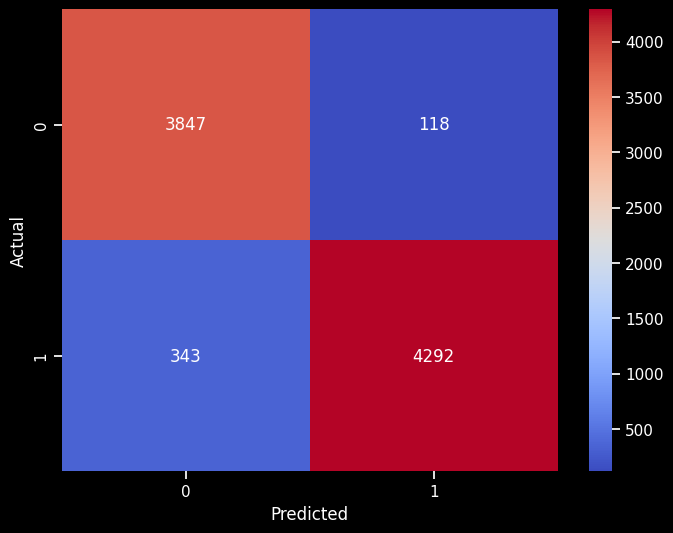

In [87]:
matrix = tf.math.confusion_matrix(y_val_en, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Evaluation on Test Data
    </h2>
</div>


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔮 Getting Predictions
    </h2>
</div>


In [88]:
test_data_1.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
id,,,,,,,,,,,,,,,,,
58645,-0.824027,0.652979,0.011285,5.0,1.695278,1.114004,1.419972,0.0,-1.290428,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
58646,-0.179323,1.381413,0.726064,2.0,0.266980,0.386852,-0.886183,1.0,-0.297669,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58647,-0.179323,-1.184201,0.529172,4.0,-1.161178,1.407203,-0.593722,1.0,-1.290428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58648,1.082486,-0.057457,0.296299,0.0,-0.288968,-0.771233,-0.497958,0.0,0.615754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58649,-0.179323,1.515137,1.047059,3.0,0.899001,1.231699,-0.403030,1.0,-0.297669,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
predictions = model.predict(test_data_1)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📄 Predictions
    </h2>
</div>


In [90]:
predictions = (predictions > 0.5).astype(int)

In [91]:
test_data_1['loan_status'] = predictions
test_data_1['loan_status'] = test_data_1['loan_status'].replace({0: 'No', 1: 'Yes'})

In [92]:
# test_data_1.reset_index()[['id', 'loan_status']].to_csv('submission.csv', index=False)